SUPERVISED MACHINE LEARNING ALGORITHEM IN PYTHON TO PREDICT STUDENTS' SCORE BASED ON THE HOURS FOR WHICH THEY STUDY
================================================================

In [53]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

In [54]:
#Loading the data
Students_Data=pd.read_csv("http://bit.ly/w-data")

In [55]:
print(Students_Data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [56]:
#looking at the descriptive statistics of the data
Students_Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


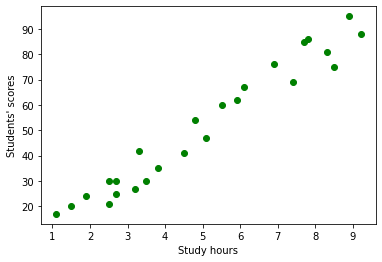

In [57]:
#plotting the variables to see observe the correlation between Hours and the Scores
plt.scatter(Students_Data.Hours,Students_Data.Scores,c="green")
plt.xlabel("Study hours")
plt.ylabel("Students' scores")
plt.show()

In [58]:
Students_Data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<b>We see a strong Positive correlation,corr coef.=0.98 between Hours and the scores
that means, if student studies for more number of hours, more will be the score he/she gets and vice a versa.

In [59]:
hours=Students_Data.iloc[:,:-1]

In [16]:
hours

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [60]:
score=Students_Data.iloc[:,-1]

In [18]:
score

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

<b>Spliting the data into Train and Test

In [61]:
from sklearn.model_selection import train_test_split
hours_train,hours_test,score_train,score_test=train_test_split(hours,score,test_size=0.2,random_state=0)

<b>Building a simple linear Regression Model

In [62]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
Model=lm.fit(hours_train,score_train)

In [63]:
#checking the coefficient and the intercept of a model
print(Model.coef_)
print(Model.intercept_)

[9.91065648]
2.018160041434683


In [64]:
#evaluating the model ontarined data
Model.score(hours_train,score_train)

0.9515510725211552

<b> Testing the model

In [65]:
score_pred=Model.predict(hours_test)
score_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [67]:
score_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [68]:
#evaluating the model on test data
Model.score(hours_test,score_test)

0.9454906892105356

<b> Visualizing the model result

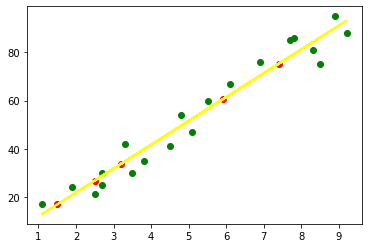

In [69]:
plt.scatter(hours_train,score_train,color = 'green')
#plotting the regression line
plt.plot(hours_train,Model.predict(hours_train),color="yellow",linewidth=2)
#plotting the predicted values
plt.scatter(hours_test,score_pred, color="red")
plt.show()

In [70]:
lm.predict([[9.5]])

array([96.16939661])

In [71]:
#Calculating MSE of a model
from sklearn import metrics
print('Mean Sqaured Error(MSE):', 
      metrics.mean_squared_error(score_test, score_pred))

Mean Sqaured Error(MSE): 21.5987693072174


In [72]:
#Calculating variation in Target variable explainedue to model(R squared Measure)
from sklearn import metrics  
print('R squared Value:', 
      metrics.r2_score(score_test, score_pred))

R squared Value: 0.9454906892105356


<b>-------FINDINGS------------

<b>1. this regression model can be written as an equation, scores=2.018+(9.91)hours.


<b>2. R squared score of a Model is 0.94549.


<b> 3. MSE of a model is 21.59877.


<b> 4. If the student studies for 9.5 hours, his/her score predicted by model is 96.1694.